In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
bm = pd.read_csv("/Users/raghav/Downloads/bank-marketing.csv", sep=";")

# Separate features and target variable
X = bm.drop(columns=['y'])
y = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'string']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
demographic_factors = ['age', 'job', 'marital', 'education']
bm = bm.drop(columns=demographic_factors)

In [19]:
bm.head()

,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
import pandas as pd
import random

# Load the datasets
# Assuming the files are CSV files; you can change the paths to match your file format and location
customer_demographics = pd.read_csv('/Users/raghav/Desktop/Apexon/customerDemographics.csv')
campaign_data = bm

# Extract the Customer_IDs
customer_ids = customer_demographics['Customer_ID'].tolist()

# Shuffle the Customer_IDs to randomize them
random.shuffle(customer_ids)

# Assign random Customer_IDs to the second dataset (repeating IDs if needed)
campaign_data['Customer_ID'] = [
    customer_ids[i % len(customer_ids)] for i in range(len(campaign_data))
]

# Save the updated second dataset
campaign_data.to_csv('/Users/raghav/Desktop/Apexon/Product_Marketing_Campaign/campaign_data.csv', index=False)

print("Customer_IDs have been randomly assigned and the updated file is saved as 'campaign_data.csv'.")
bm = campaign_data

Customer_IDs have been randomly assigned and the updated file is saved as 'campaign_data.csv'.


# READ DATA

In [23]:
bm = pd.read_csv("/Users/raghav/Desktop/Apexon/Product_Marketing_Campaign/campaign_data.csv")

# Data Visualization:

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: y, dtype: float64


/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_79194/2577402059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='viridis')


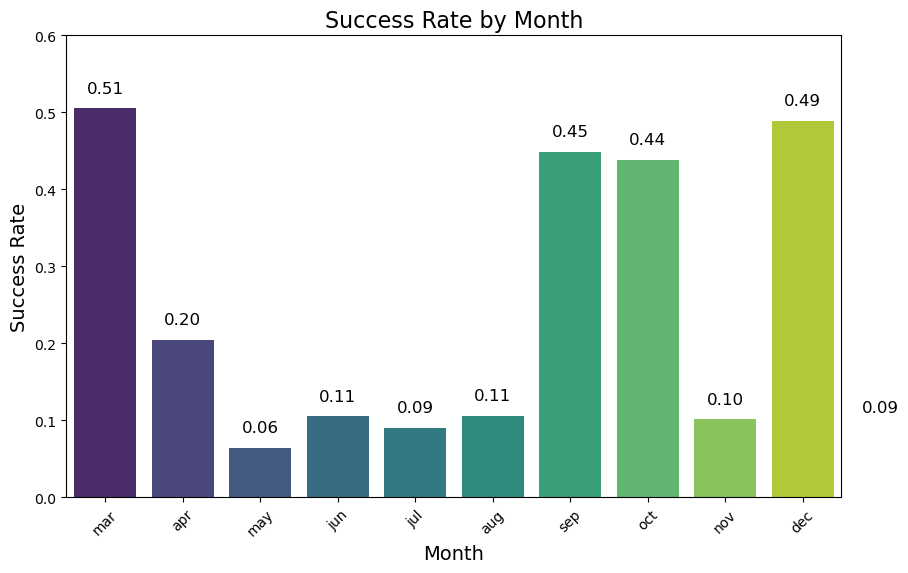

In [24]:
# Success rate by month
monthly_trend = bm.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
print(monthly_trend)

monthly_trend = bm.groupby('month')['y'].apply(lambda x: (x == 'yes').mean())
monthly_trend = monthly_trend.reindex(['mar','apr','may','jun','jul', 'aug', 'sep','oct','nov','dec', 'jul'])
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='viridis')

# Adding titles and labels
plt.title('Success Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 0.6)

# Adding value labels on each bar
for index, value in enumerate(monthly_trend.values):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# Display the plot
plt.show()

day_of_week
fri     846
mon     847
thu    1045
tue     953
wed     949
Name: y, dtype: int64


/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_79194/3431945943.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_success.index, y=daily_success.values, palette="viridis")


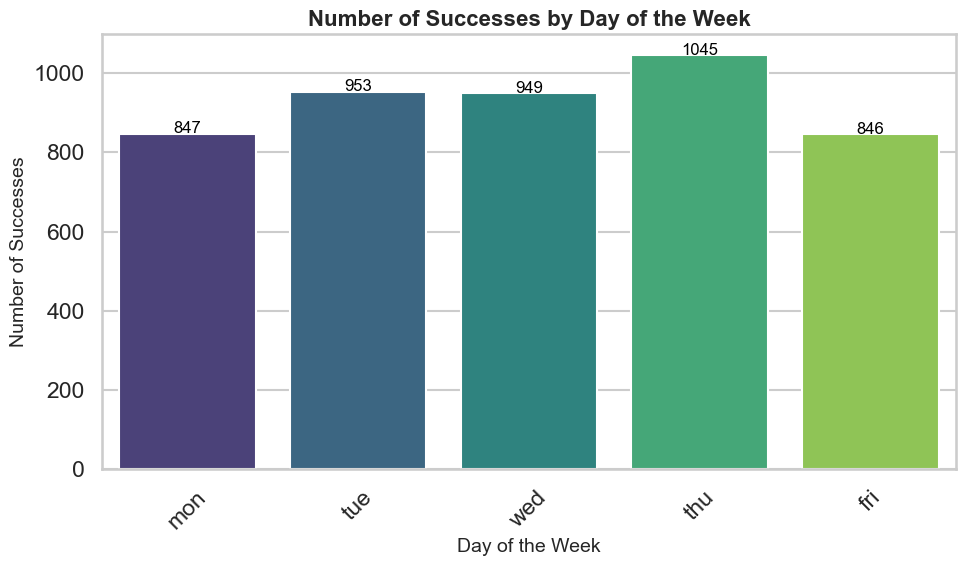

In [25]:
# Count successes by day of the week
daily_success = bm.groupby('day_of_week')['y'].apply(lambda x: (x == 'yes').sum())
print(daily_success)

days_order = ['mon', 'tue', 'wed', 'thu', 'fri']
daily_success = daily_success.reindex(days_order)

# Set the style and context for high-quality visualization
sns.set(style="whitegrid", context="talk", palette="muted")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_success.index, y=daily_success.values, palette="viridis")

# Add titles and labels
ax.set_title('Number of Successes by Day of the Week', fontsize=16, weight='bold')
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Number of Successes', fontsize=14)

# Annotate the bars with the exact values
for i, v in enumerate(daily_success.values):
    ax.text(i, v + 1, str(v), color='black', ha='center', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

pdays
0     0.666667
1     0.307692
2     0.606557
3     0.678815
4     0.533898
5     0.630435
6     0.701456
7     0.666667
8     0.666667
9     0.546875
10    0.576923
11    0.535714
12    0.448276
13    0.777778
14    0.550000
15    0.666667
16    0.545455
17    0.250000
18    0.571429
19    0.333333
20    0.000000
21    1.000000
22    0.666667
25    1.000000
26    1.000000
27    1.000000
Name: y, dtype: float64


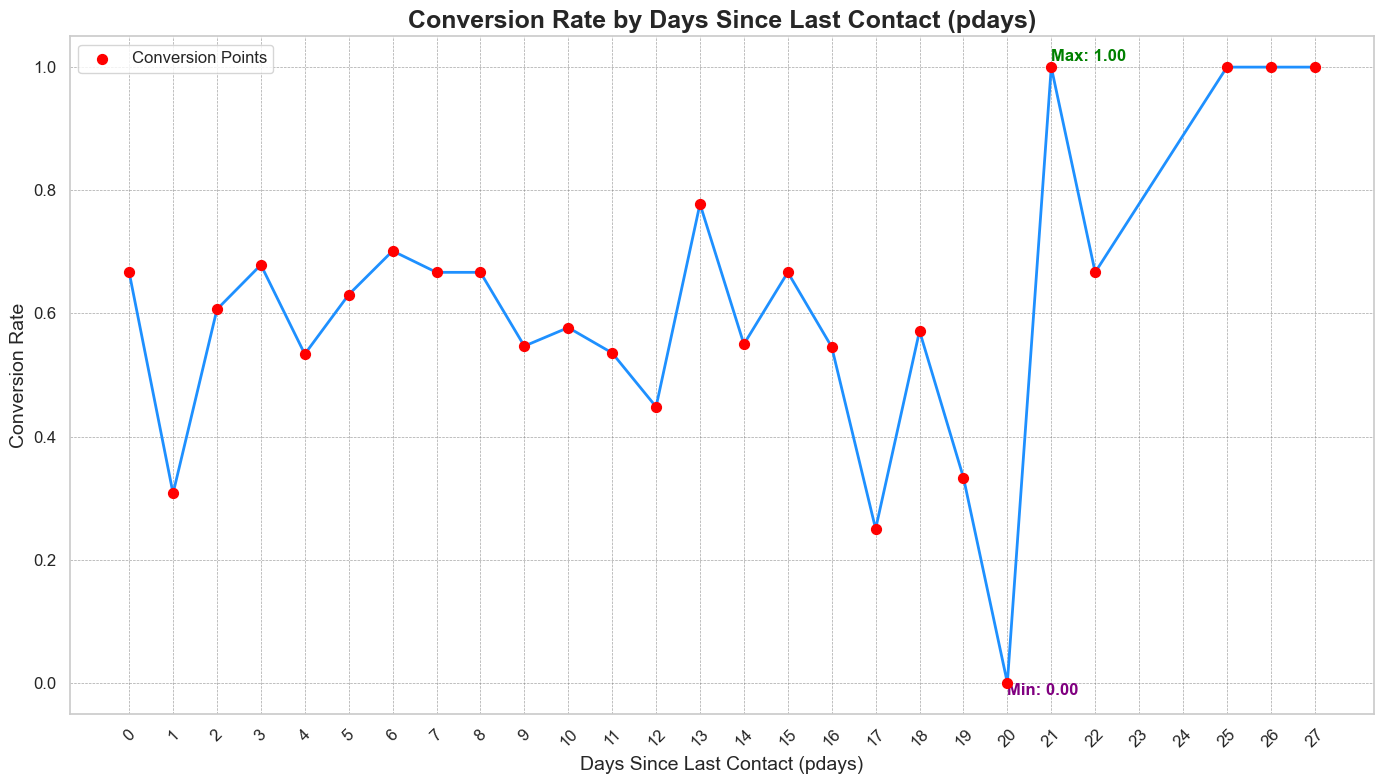

In [26]:
# Conversion rate by days since last contact
pdays_analysis = bm.groupby('pdays')['y'].apply(lambda x: (x == 'yes').mean())
pdays_analysis = pdays_analysis[pdays_analysis.index != 999] #Outlier removal, client not previously contacted
print(pdays_analysis)

pdays_analysis = pdays_analysis.reset_index()
pdays_analysis.columns = ['pdays', 'conversion_rate']

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=pdays_analysis,
    x='pdays',
    y='conversion_rate',
    marker='o',
    color='dodgerblue',
    linewidth=2
)

# Highlight important points
plt.scatter(
    pdays_analysis['pdays'], pdays_analysis['conversion_rate'], 
    color='red', s=50, zorder=5, label='Conversion Points'
)

# Titles and labels
plt.title("Conversion Rate by Days Since Last Contact (pdays)", fontsize=18, weight='bold')
plt.xlabel("Days Since Last Contact (pdays)", fontsize=14)
plt.ylabel("Conversion Rate", fontsize=14)

# Customize x-axis ticks to show all pdays values
plt.xticks(ticks=range(int(pdays_analysis['pdays'].min()), int(pdays_analysis['pdays'].max()) + 1), fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding grid and style
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating maximum and minimum points
max_point = pdays_analysis.loc[pdays_analysis['conversion_rate'].idxmax()]
min_point = pdays_analysis.loc[pdays_analysis['conversion_rate'].idxmin()]
plt.text(max_point['pdays'], max_point['conversion_rate'] + 0.01, 
         f"Max: {max_point['conversion_rate']:.2f}", color='green', fontsize=12, weight='bold')
plt.text(min_point['pdays'], min_point['conversion_rate'] - 0.02, 
         f"Min: {min_point['conversion_rate']:.2f}", color='purple', fontsize=12, weight='bold')

# Show legend
plt.legend(fontsize=12)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_79194/1257262202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contacts_per_month.index, y=contacts_per_month.values, palette='viridis')


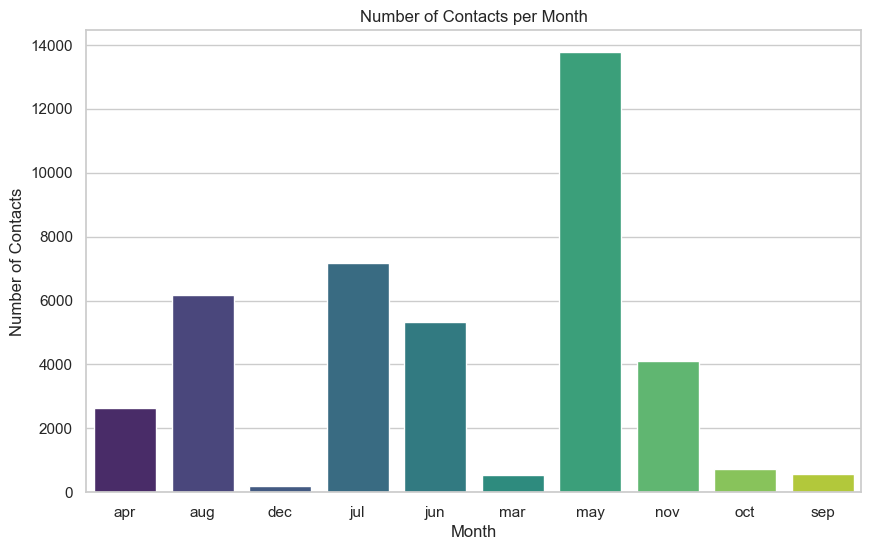

In [27]:
contacts_per_month = bm['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=contacts_per_month.index, y=contacts_per_month.values, palette='viridis')
plt.title('Number of Contacts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()

/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_79194/1411621518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contacts_per_day.index, y=contacts_per_day.values, palette='viridis')


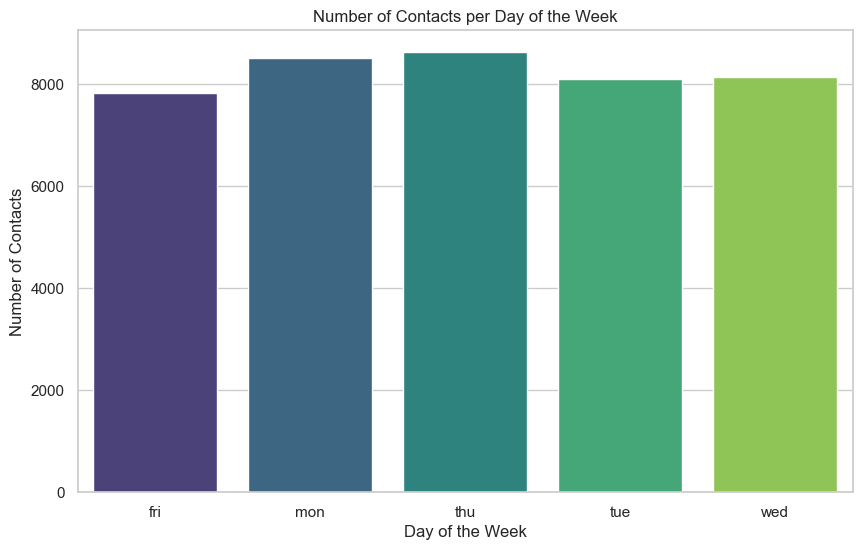

In [28]:
contacts_per_day = bm['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=contacts_per_day.index, y=contacts_per_day.values, palette='viridis')
plt.title('Number of Contacts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Contacts')
plt.show()

/var/folders/4k/ppk1bjp50_33bm8_tl6w0z4h0000gn/T/ipykernel_79194/1102181118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome.index, y=outcome.values, palette='viridis')


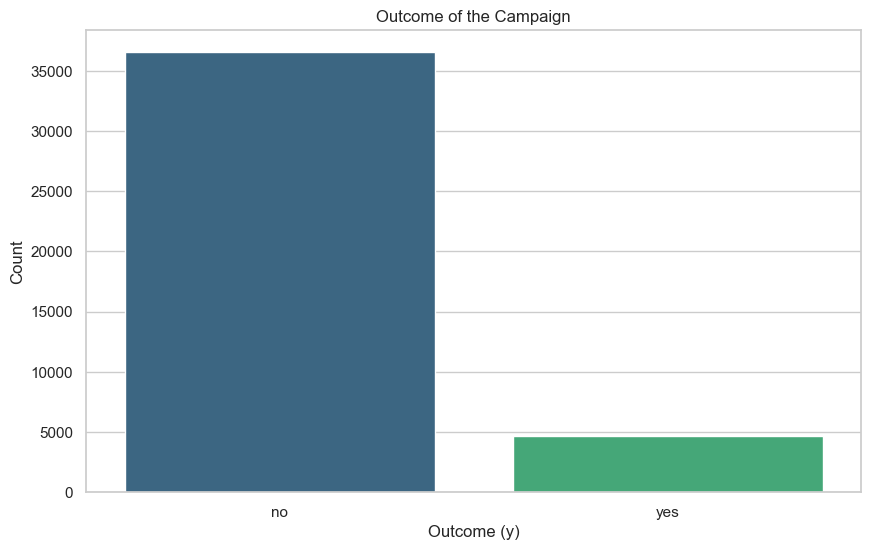

In [29]:
# Outcome of the campaign
outcome = bm['y'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome.index, y=outcome.values, palette='viridis')
plt.title('Outcome of the Campaign')
plt.xlabel('Outcome (y)')
plt.ylabel('Count')
plt.show()


## Monthly Time Series Analysis and Predicted Outcome of the Campaign

/Users/raghav/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/raghav/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/raghav/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/raghav/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473

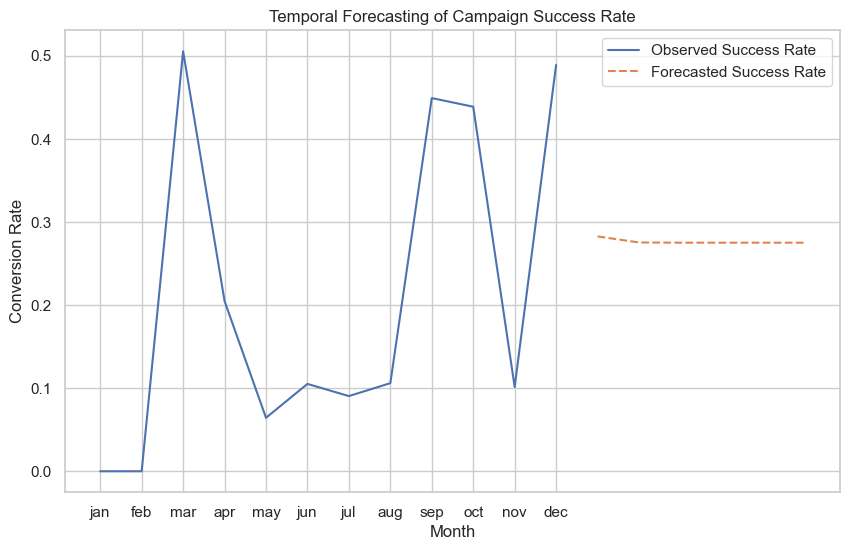

          Month  Forecasted Success Rate
0  Next_Month_1                 0.282631
1  Next_Month_2                 0.275346
2  Next_Month_3                 0.275089
3  Next_Month_4                 0.275080
4  Next_Month_5                 0.275080
5  Next_Month_6                 0.275080


In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'month' is already in order and conversion rate is calculated
# Step 1: Aggregate success rate by month
bm['y_binary'] = bm['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert to binary
monthly_data = bm.groupby('month')['y_binary'].mean()  # Calculate success rate

# Step 2: Ensure proper ordering of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_data = monthly_data.reindex(month_order)

# Step 3: Handle missing values (if any months are missing)
monthly_data = monthly_data.fillna(0)  # Replace missing rates with 0

# Step 4: Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))  # ARIMA(p, d, q)
arima_result = model.fit()

# Step 5: Forecast future months (e.g., next 6 months)
forecast_steps = 6
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.Index(month_order).append(pd.Index(['next_month' + str(i) for i in range(1, forecast_steps + 1)]))

# Step 6: Visualize
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label="Observed Success Rate")
plt.plot(forecast.index, forecast, label="Forecasted Success Rate", linestyle='--')
plt.xlabel("Month")
plt.ylabel("Conversion Rate")
plt.title("Temporal Forecasting of Campaign Success Rate")
plt.legend()
plt.show()

# Step 7: Print forecasted values
forecast_df = pd.DataFrame({
    'Month': ['Next_Month_' + str(i) for i in range(1, forecast_steps + 1)],
    'Forecasted Success Rate': forecast.values
})
print(forecast_df)

# Product Targeting Model

In [32]:
bm = bm = pd.read_csv("/Users/raghav/Desktop/Apexon/Product_Marketing_Campaign/campaign_data.csv")

# Data Spliting

In [33]:
bm.head()

,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Customer_ID
0,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,88454
1,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,43627
2,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,49783
3,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,74480
4,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,98895


In [34]:
# Split the data into training and testing sets
model_train_data, test_data = train_test_split(bm, test_size=0.1, random_state=42)

model_train_data.head()

,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Customer_ID
38651,no,yes,no,cellular,nov,tue,358,1,999,0,nonexistent,-3.4,92.649,-30.1,0.720,5017.5,yes,34154
12733,unknown,no,no,cellular,jul,tue,262,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,38739
35807,no,yes,no,cellular,may,mon,953,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no,95298
1423,no,yes,no,telephone,may,thu,403,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,79270
52,no,no,no,telephone,may,mon,253,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,16972


In [14]:
test_data.to_csv('/Users/raghav/Desktop/Apexon/Product_Marketing_Campaign/product_targeting_test_data')

# Model Building

In [35]:
train_data = model_train_data
columns_to_drop = ['Customer_ID', 'y_binary']
train_data = pd.get_dummies(train_data.drop(columns=columns_to_drop), drop_first=True)

KeyError: "['y_binary'] not found in axis"

In [ ]:
X = train_data.drop(columns=['y_yes'])
y = train_data['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Evaluation & Testing

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    results[model_name] = {'Accuracy': accuracy, 'ROC AUC Score': roc_auc}

# Display the results
results_df = pd.DataFrame(results).T
results_df

In [ ]:
# Train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

In [ ]:
train_data_scaled = scaler.transform(train_data.drop(columns=['y_yes']))
model_train_data['probability_yes'] = model.predict_proba(train_data_scaled)[:, 1]

In [ ]:
model_train_data.rename(columns={'y': 'customer_response', 'probability_yes':'probability_of_buying', 'y_binary':'customer_response_in_binary'}, inplace=True)
model_train_data.rename(columns={'y': 'customer_response'}, inplace=True)
model_train_data.head()

In [49]:
model_train_data.to_csv("/Users/raghav/Desktop/Apexon/Product_Marketing_Campaign/model_output_data.csv")